In [ ]:
pip install pandas numpy scikit-learn mlflow matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets


In [ ]:
wine = datasets.load_wine()

In [ ]:
# Access the numerical data from the wine Bunch
data = wine['data']

data

# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

"""#### Create DataFrame"""

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
Wine1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
Wine2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
Wine3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
Wine4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


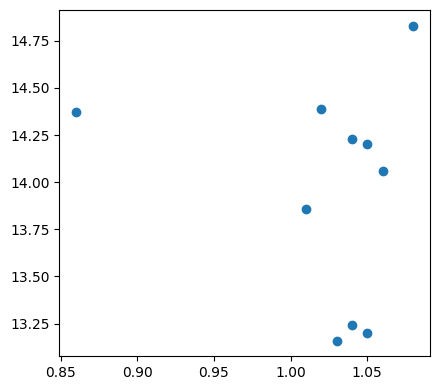

In [ ]:
# Get the first 10 rows and the 'hue' and 'alcohol' columns of the data
plotting_data = data[["hue", "alcohol"]][:10]
# ===============

# Create the Figure and Axis objects
fig, ax = plt.subplots(1, figsize=(4.5,4))

# Call the scatter() method of the axis object
ax.scatter(plotting_data.iloc[:,0], plotting_data.iloc[:,1])

# If you were running this on your computer, you could save the images
fig.tight_layout()

In [ ]:
from scipy.spatial.distance import pdist, squareform

# it is common to import seaborn as sns
import seaborn as sns

"""#### Calculating pairwise distances"""

pairwise_distances = squareform(pdist(data))

Text(905.5555555555557, 0.5, 'Wine$_{j}$')

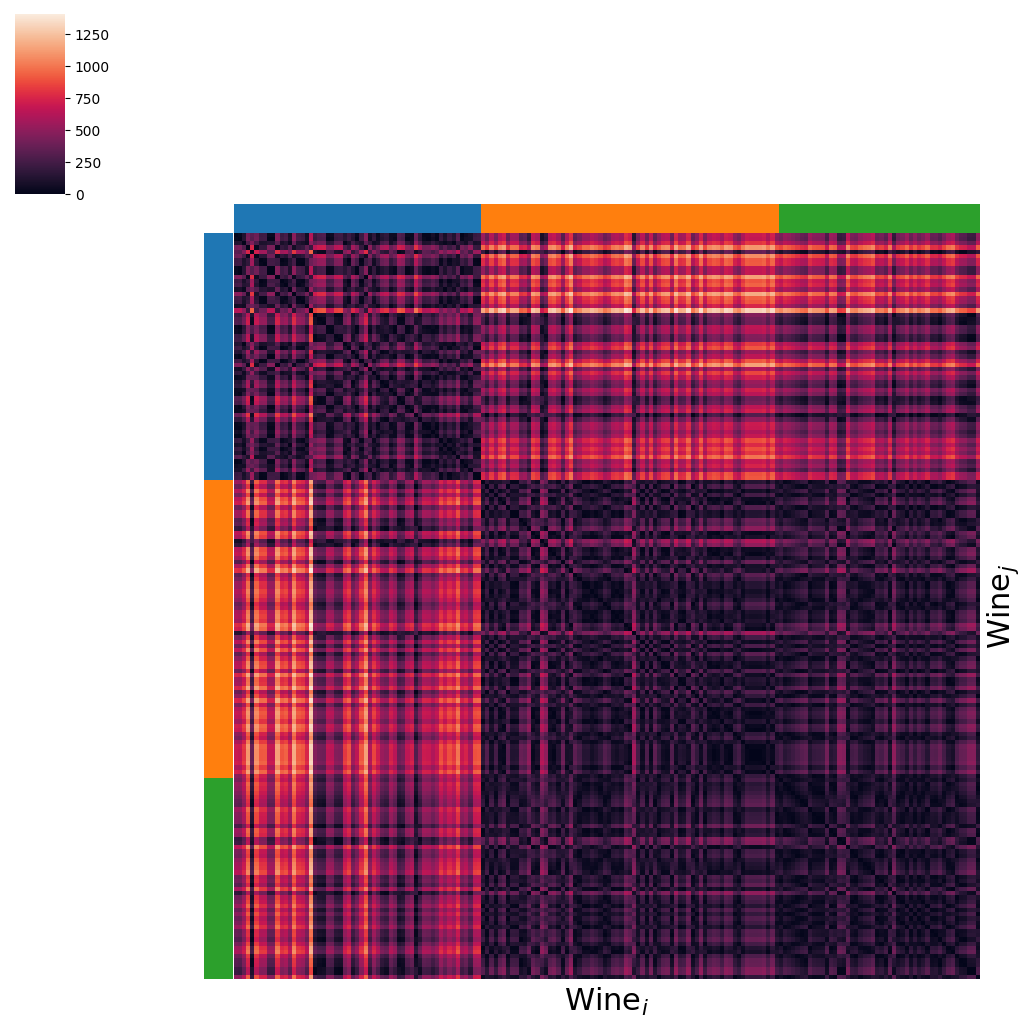

In [ ]:
cg = sns.clustermap(pairwise_distances,
               row_colors=plt.cm.tab10(wine['target']),
               col_colors=plt.cm.tab10(wine['target']),
               row_cluster=False, col_cluster=False,
               xticklabels=[], yticklabels=[])

cg.ax_heatmap.set_xlabel(r'Wine$_{i}$', fontsize=22)
cg.ax_heatmap.set_ylabel(r'Wine$_{j}$', fontsize=22, rotation=90)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(905.5555555555557, 0.5, 'Wine$_{j}$')

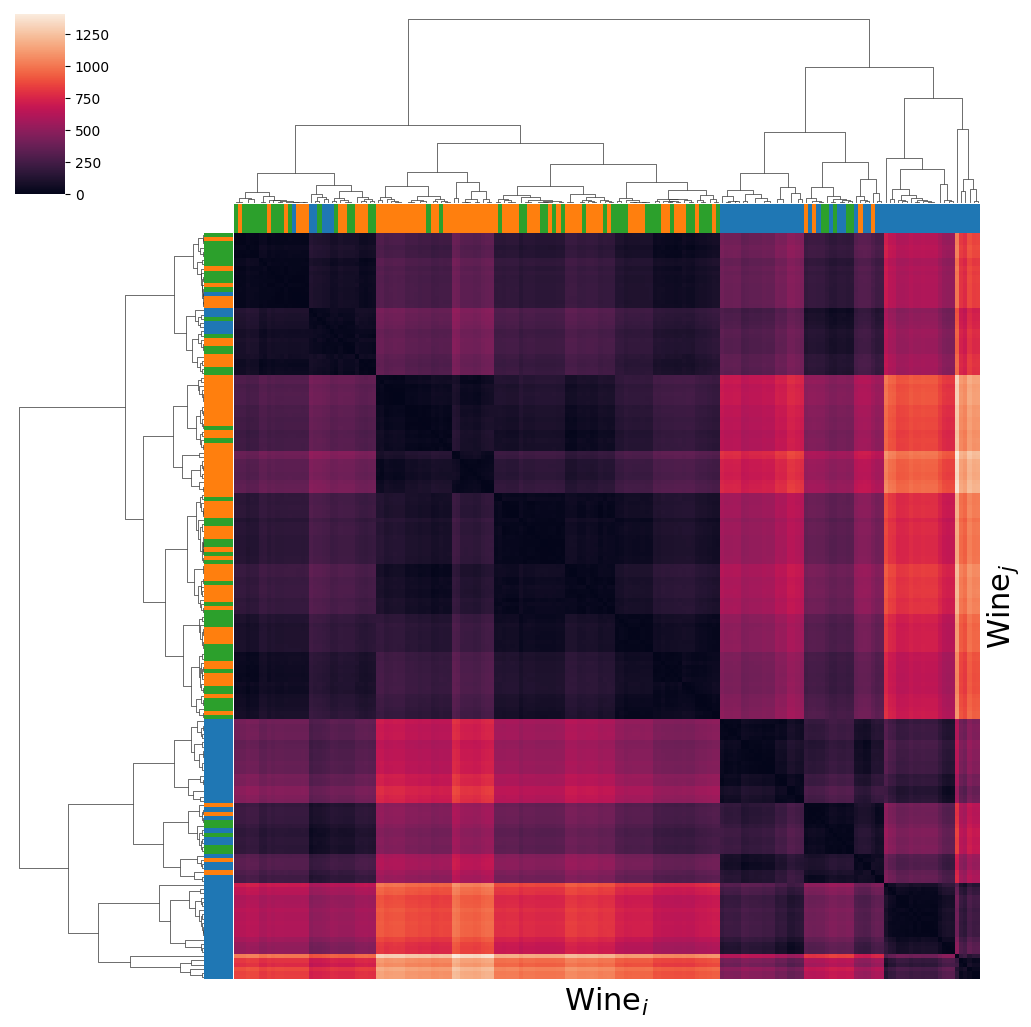

In [ ]:
cg = sns.clustermap(pairwise_distances,
               row_colors=plt.cm.tab10(wine['target']),
               col_colors=plt.cm.tab10(wine['target']),
               xticklabels=[], yticklabels=[])

cg.ax_heatmap.set_xlabel(r'Wine$_{i}$', fontsize=22)
cg.ax_heatmap.set_ylabel(r'Wine$_{j}$', fontsize=22, rotation=90)

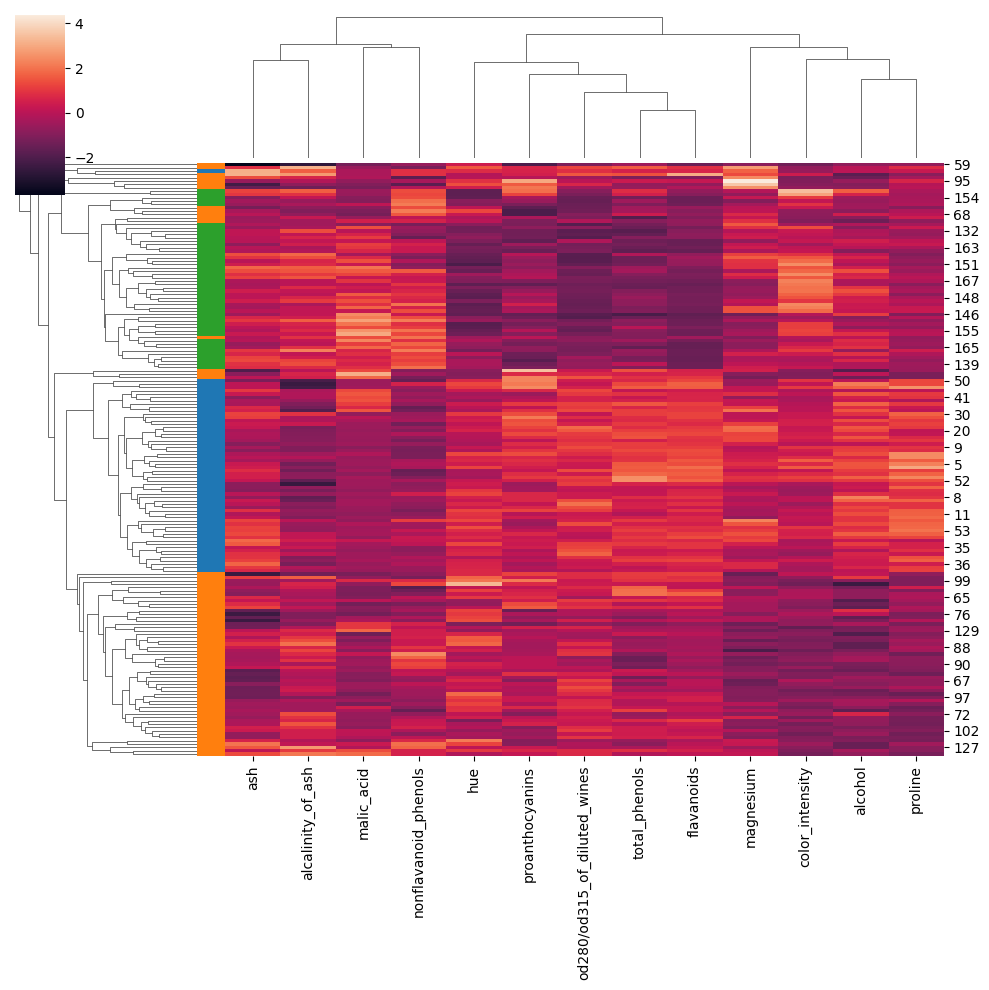

In [ ]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data)

sns.clustermap(data_scaled, xticklabels=data.columns, row_colors=plt.cm.tab10(wine['target']))